In [1]:
!git clone https://github.com/chulminkw/DLCV.git
!ls -lia DLCV

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
Receiving objects: 100% (234/234), 142.72 MiB | 31.60 MiB/s, done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Resolving deltas: 100% (89/89), done.
total 11016
2244713 drwxr-xr-x 7 root root    4096 Apr 12 08:29  .
1310810 drwxr-xr-x 1 root root    4096 Apr 12 08:29  ..
3429833 drwxr-xr-x 2 root root    4096 Apr 12 08:29  colab_tf115_modify_files
3569649 drwxr-xr-x 6 root root    4096 Apr 12 08:29  data
2244733 drwxr-xr-x 8 root root    4096 Apr 12 08:29  Detection
2242792 -rw-r--r-- 1 root root 6567662 Apr 12 08:29  DLCV_Colab_SrcCode_20200905.zip
2244716 drwxr-xr-x 8 root root    4096 Apr 12 08:29  .git
2242833 -rw-r--r-- 1 root root 2063693 Apr 12 08:29  labelimg.pptx
2242834 -rw-r--r-- 1 root root 2612271 Apr 12 08:29 '구글클라우드 가입하기.pdf'
2242832 -rw-r--r-- 1 root root     142 Apr 12 08:29  README.md
2244746

In [2]:
!pip install tensorflow-gpu==1.15.2
!pip install keras==2.3.0

     |████████████████████████████████| 411.0MB 43kB/s 
     |████████████████████████████████| 512kB 47.6MB/s 
     |████████████████████████████████| 3.8MB 48.8MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=1fd8f2fa20397db8a6ea08fb7be6f7164db52210985dded6be2d8a74b4c2d226
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing instal

In [3]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

1.15.2
2.3.0


Using TensorFlow backend.


In [4]:
# gpu 연결 유무 확인
tf.test.gpu_device_name()

'/device:GPU:0'

# 단일 이미지 Object Detection

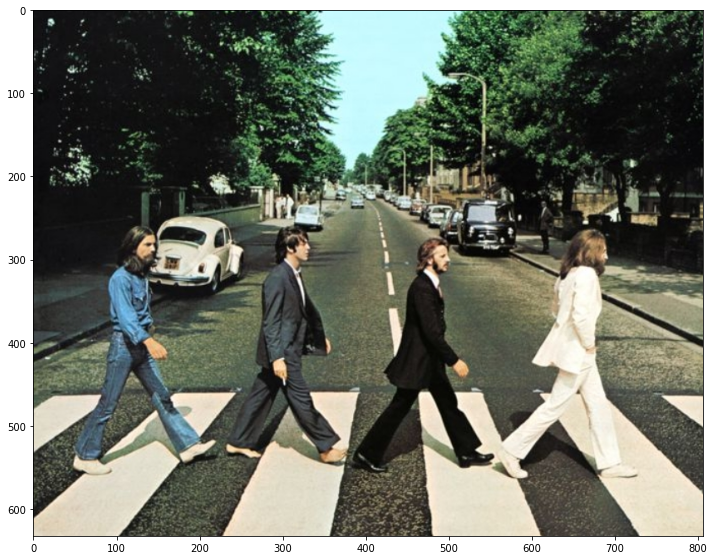

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content/DLCV'
img = cv2.imread(os.path.join(default_dir, 'data/image/beatles01.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [6]:
# 텐서플로우에서 로드하는 모델은 key가 1부터 시작하고 91개가 있는 dict 사용
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [7]:
!rm -rf /content/DLCV/Detection/fast_rcnn/pretrained
!mkdir /content/DLCV/Detection/fast_rcnn/pretrained
# pretrained 디렉토리가 생성되었는지 확인 합니다. 
%cd /content/DLCV/Detection/fast_rcnn
!ls

/content/DLCV/Detection/fast_rcnn
OpenCV_FasterRCNN_ObjectDetection.ipynb
pretrained
Tensorflow_FasterRCNN_ObjectDetection.ipynb


In [8]:
### coco 데이터 세트로 pretrained 된 faster rcnn weight 파일과 config용 graph pbtxt 다운로드 
%cd /content/DLCV/Detection/fast_rcnn/pretrained
!echo "##### downloading pretrained weight file and config pbtxt file"
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

# tar 파일 압축 해제
!echo "##### uncompressing tar file"
!tar -xvf faster_rcnn*.gz

# config용 pbtxt 파일의 이름을 graph.pbtxt로 변경
# echo "renaming pbtxt file name"
!mv /content/DLCV/Detection/fast_rcnn/pretrained/faster_rcnn*.pbtxt /content/DLCV/Detection/fast_rcnn/pretrained/faster_rcnn_resnet50_coco_2018_01_28/graph.pbtxt

# tar 파일 삭제
!echo "##### deleting tar file" 
!rm *.gz

# weight파일과 config 파일이 있는 pretrained/faster_rcnn_resnet50_coco_2018_01_28 디렉토리 내부 확인 
!echo "##### check out pretrained/faster_rcnn_resnet50_coco_2018_01_28"
!ls /content/DLCV/Detection/fast_rcnn/pretrained/faster_rcnn_resnet50_coco_2018_01_28

/content/DLCV/Detection/fast_rcnn/pretrained
##### downloading pretrained weight file and config pbtxt file
--2021-04-12 08:35:50--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

faster_rcnn_resnet5 100%[===================>] 363.69M   158MB/s    in 2.3s    

2021-04-12 08:35:53 (158 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-04-12 08:35:53--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.

type of out var: <class 'list'> length of out: 4
Detection 수행시간: 5.16 초


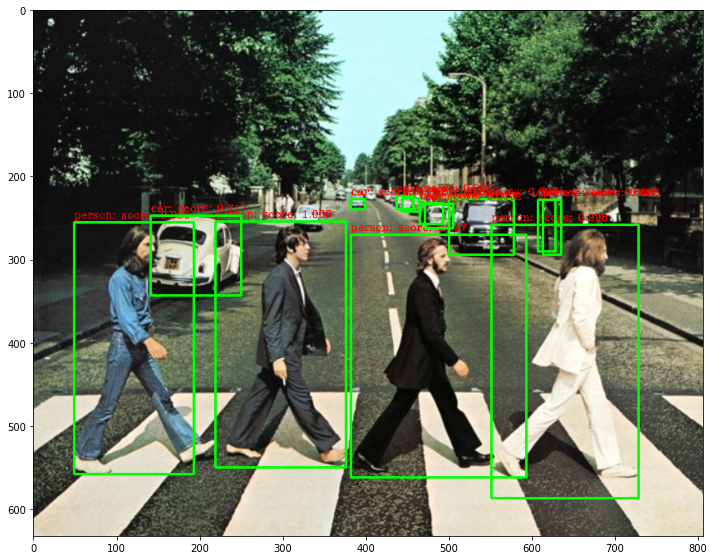

In [18]:
# Pretrained 모델 로드하고 단일 이미지 객체 탐지하기
import numpy as np
import tensorflow as tf
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

default_rcnn_dir='/content/DLCV/Detection/fast_rcnn'

# Pretrained 모델 로드하기
with tf.gfile.FastGFile(os.path.join(default_rcnn_dir, 'pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb'),'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())

with tf.Session() as sess:
  # 그래프 초기화
  sess.graph.as_default()
  tf.import_graph_def(graph_def, name='')

  # 입력 이미지 RGB로 변경
  img = cv2.imread(os.path.join(default_dir, 'data/image/beatles01.jpg'))
  draw_img = img.copy()  # 이미지 복사
  # 텐서플로우 Pretrained 모델로 스케일링된 좌표값들을 반환하기 떄문에 이미지 높이, 너비 더해주어야 함
  height = img.shape[0]
  width = img.shape[1]
  # 텐서플로우에는 OpenCV처럼 swapRB가 없기 때문에 직접 바꾸어주기
  inp = img[:, :, [2, 1, 0]]  # BGR[0,1,2] -> RGB[2,1,0]
  start = time.time()
  # 디텍션 수행
  out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'), # 찾아진 오브젝트(바운딩 박스)개수
                  sess.graph.get_tensor_by_name('detection_scores:0'), # Confidence score
                  sess.graph.get_tensor_by_name('detection_boxes:0'), # 찾아진 바운딩박스 좌표
                  sess.graph.get_tensor_by_name('detection_classes:0')], # 찾아진 오브젝트 클래스 id
                  feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)}) # 4차원 shape의 가장 첫번째숫자는 batch_size임!
  print('type of out var:', type(out), 'length of out:', len(out)) # OpenCV는 ndarray를 반환했지만 텐서플로우는 list를 반환
  #print(out)
  green_color = (0, 255, 0)
  red_color = (0, 0, 255) # BGR에서 R

  num_detections = int(out[0][0])
  for i in range(num_detections):
    class_id = int(out[3][0][i])  # 리스트안에 array가 담겨있어서 그럼
    score = float(out[1][0][i])
    bbox = [float(v) for v in out[2][0][i]]
    if score > 0.5: # 텐서플로우는 y1, x1, y2, x2 순서로 반환함!
      left = int(bbox[1] * width)
      top = int(bbox[0] * height)
      right = int(bbox[3] * width)
      bottom = int(bbox[2] * height)
      # 바운딩 박스 새기기
      cv2.rectangle(draw_img, (left, top), (right, bottom),
                    green_color, thickness=2)
      caption = f"{labels_to_names[class_id]}: score: {score :.3f}"
      # 텍스트 캡션 박스에 넣기
      cv2.putText(draw_img, caption, (left, top-5),
                  cv2.FONT_HERSHEY_COMPLEX, 0.4, red_color, 1)
  print("Detection 수행시간:", round(time.time()-start, 2), '초')

# 오브젝트 디텍션한 결과 이미지 출력
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

  
    
                        

Detection 수행시간: 5.42 초


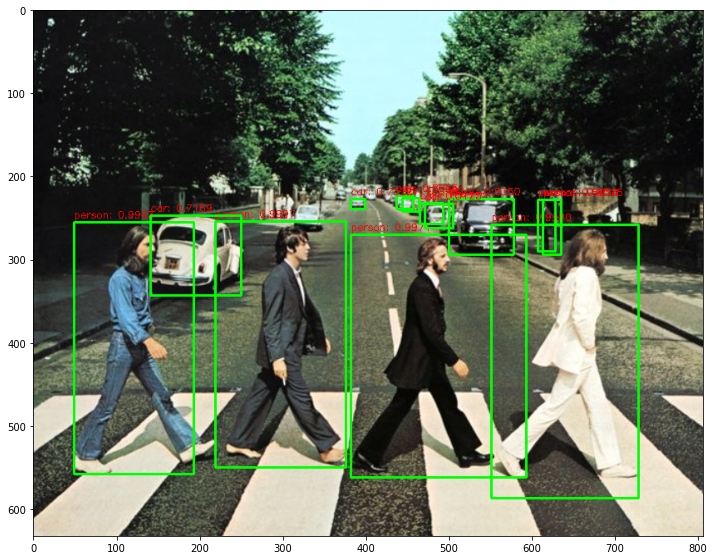

In [19]:
# 함수화
def get_tensor_detected_image(sess, img_array, use_copied_array):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    if use_copied_array:
        draw_img_array = img_array.copy()
    else:
        draw_img_array = img_array
    
    inp = img_array[:, :, [2, 1, 0]]  # BGR2RGB

    start = time.time()
    # Object Detection 수행. 
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    # Bounding Box 시각화 
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.5:
            left = bbox[1] * cols
            top = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv2.rectangle(draw_img_array, (int(left), int(top)), (int(right), int(bottom)), green_color, thickness=2)
            caption = "{}: {:.4f}".format(labels_to_names[classId], score)
            cv2.putText(draw_img_array, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
            #print(caption)
    print('Detection 수행시간:',round(time.time() - start, 2),"초")
    return draw_img_array
# end of function

#inference graph를 읽음. 
with tf.gfile.FastGFile(os.path.join(default_rcnn_dir, 'pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    # Session 시작하고 inference graph 모델 로딩 
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    # 입력 이미지 생성 및 BGR을 RGB로 변경 
    img = cv2.imread(os.path.join(default_dir, 'data/image/beatles01.jpg'))
    draw_img = get_tensor_detected_image(sess, img, True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

# Video Object Detection 수행

In [26]:
default_dir = '/content/DLCV'
# Video I/O 경로 설정
video_input_path = os.path.join(default_dir, 'data/video/John_Wick_small.mp4')
video_output_path = os.path.join(default_dir, 'data/output/John_Wick_small_tensor.avi')

# Video Capture 정의
cap = cv2.VideoCapture(video_input_path)
# 코덱 설정
codec = cv2.VideoWriter_fourcc(*'XVID')

# 비디오 프레임 사이즈와 FPS 값 얻기
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)

# Video Writer 정의 for 오브젝트 디텍션한 비디오 만들기 위함
vid_writer = cv2.VideoWriter(video_output_path, codec, 
                             vid_fps, vid_size)
# 프레임 개수 얻기
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Number of frames:", frame_cnt)

green_color = (0, 255, 0)
red_color = (0, 0, 255)

# Pretrained 텐서플로우 모델 불러오기
with tf.gfile.FastGFile(os.path.join(default_rcnn_dir, 'pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb'), 'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())

with tf.Session() as sess:
  sess.graph.as_default()
  # 로드한 Pretrained 모델 임포트
  tf.import_graph_def(graph_def, name='')

  # 프레임 더이상 나오지 않을 때까지 무한반복
  while True:
    hasFrame, imgFrame = cap.read()
    if not hasFrame:
      print("더이상 처리할 프레임이 없습니다!")
      break
    
    # 한 프레임씩 Object Detection 수행
    draw_img_frame = get_tensor_detected_image(sess, imgFrame, False)
    # 디텍션 한 프레임을 다시 하나씩 쌓아서 영상으로 만들기
    vid_writer.write(draw_img_frame)

vid_writer.release()
cap.release()



Number of frames: 58
Detection 수행시간: 6.87 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.11 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.11 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0